<a href="https://colab.research.google.com/github/Kawakubo322/fish_recognition/blob/main/Fish_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#npz形式データセットのアップロード
from google.colab import files
uploaded = files.upload()

カサゴ、クロダイ、マダイ各300枚弱で判別モデル作成

In [ ]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from keras.optimizers import RMSprop
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import cv2

def def_model(in_shape, nb_classes):
  model = Sequential()
  model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=in_shape))
  model.add(Conv2D(32,(3,3),activation="relu"))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(64,(3,3),activation="relu"))
  model.add(Conv2D(64,(3,3),activation="relu"))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(512,activation="relu"))
  model.add(Dropout(0.5))
  model.add(Dense(nb_classes,activation="softmax"))
  return model

def get_model(in_shape, nb_classes):
  model = def_model(in_shape,nb_classes)
  model.compile(
      loss = "categorical_crossentropy",
      optimizer = RMSprop(),
      metrics = ["accuracy"])
  return model

img_rows = 128
img_cols = 128
img_color = 3
in_shape = (img_rows, img_cols, img_color)
nb_classes = 3
photos = np.load(./fish_photos.npz)
x = photos["x"]
y = photos["y"]

x = x.reshape(-1, img_rows, img_cols, img_color)
x = x.astype("float32") / 255

y = keras.utils.np_utils.to_categorical(y.astype("int32"),nb_classes)

x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8)
model = get_model(in_shape, nb_classes)
hist = model.fit(x_train, y_train, batch_size=32, epochs=100, verbose=1,
                 validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=1)
print("正解率=", score[1], "loss=", score[0])

plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.title("Accuracy")
plt.legend(["train", "test"], loc = "upper left")
plt.show()
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title("Loss")
plt.legend(["train", "test"], loc = "upper left")
plt.show()

model.save_weights("./photos-model-light.h5")

DataAugmentationによる精度向上

In [ ]:
#https://ymgsapo.com/2019/03/03/data-augmentation/

In [ ]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from keras.optimizers import RMSprop
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import cv2

def def_model(in_shape, nb_classes):
  model = Sequential()
  model.add(Conv2D(64,kernel_size=(3,3),activation="relu",input_shape=in_shape))
  model.add(Conv2D(64,(3,3),activation="relu"))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(128,(3,3),activation="relu"))
  model.add(Conv2D(128,(3,3),activation="relu"))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(512,activation="relu"))
  model.add(Dropout(0.5))
  model.add(Dense(nb_classes,activation="softmax"))
  return model

def get_model(in_shape, nb_classes):
  model = def_model(in_shape,nb_classes)
  model.compile(
      loss = "categorical_crossentropy",
      optimizer = RMSprop(),
      metrics = ["accuracy"])
  return model

img_rows = 128
img_cols = 128
img_color = 3
in_shape = (img_rows, img_cols, img_color)
nb_classes = 3
photos = np.load("./fish_photos.npz")
x = photos["x"]
y = photos["y"]

x = x.reshape(-1, img_rows, img_cols, img_color)
x = x.astype("float32") / 255

y = keras.utils.np_utils.to_categorical(y.astype("int32"),nb_classes)

x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8)

datagen = ImageDataGenerator(zoom_range=[-1,1])

model = get_model(in_shape, nb_classes)
hist = model.fit_generator(datagen.flow(x_train, y_train, batch_size=32), epochs=100, verbose=1,
                 validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=1)
print("正解率=", score[1], "loss=", score[0])

plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.title("Accuracy")
plt.legend(["train", "test"], loc = "upper left")
plt.show()
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title("Loss")
plt.legend(["train", "test"], loc = "upper left")
plt.show()

model.save_weights("./photos-model-light2.h5")

In [ ]:
#判定用画像アップロード
from google.colab import files
uploaded = files.upload()

判定後クックパッドからレシピを提案

In [ ]:
import requests
from bs4 import BeautifulSoup
from urllib.request import urlopen
from PIL import Image

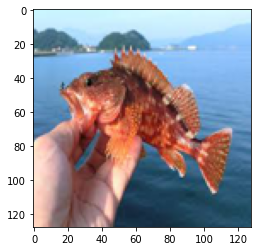

この魚は、 カサゴ
確率は 99 %
カサゴ の料理例：
まるごとバリッバリ！ カサゴの唐揚げ https://cookpad.com/recipe/6234761
かさご の 煮つけ https://cookpad.com/recipe/6538004
釣って来たお魚で料理＊カサゴの味噌汁＊ https://cookpad.com/recipe/4745393
絶品！かさごのしゃぶ鍋(他のお刺身でも) https://cookpad.com/recipe/6521937
これが定番♪骨まで食べよう！かさご姿揚げ https://cookpad.com/recipe/3716959


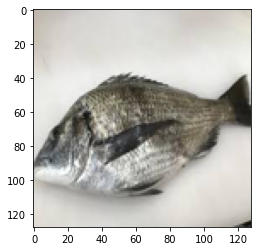

この魚は、 クロダイ
確率は 89 %
クロダイ の料理例：
黒鯛（チヌ）のムニエル キムチソース https://cookpad.com/recipe/6033200
黒鯛のバジルムニエル https://cookpad.com/recipe/5917820
炊飯器でチヌの炊き込みご飯 https://cookpad.com/recipe/6544090
超簡単☆ちぬの煮付け https://cookpad.com/recipe/6231069
簡単☆チヌ(クロダイ)の唐揚げ https://cookpad.com/recipe/3549057


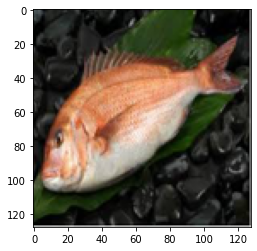

この魚は、 マダイ
確率は 71 %
マダイ の料理例：
真鯛の煮つけ https://cookpad.com/recipe/6559713
真鯛のアラの塩焼き風で冷やしうどん https://cookpad.com/recipe/6320086
真鯛のムニエル　レモンバター醤油で https://cookpad.com/recipe/6422109
真鯛の土鍋ご飯(鯛めし) https://cookpad.com/recipe/5880326
真鯛のアクアパッツァ https://cookpad.com/recipe/6464563


In [ ]:
LABELS = ["カサゴ", "クロダイ", "マダイ"]

model = get_model(in_shape, nb_classes)
model.load_weights("photos-model-light2.h5")

def check_photo(path):
  img = Image.open(path)
  img = img.convert("RGB")
  img = img.resize((img_cols, img_rows))
  plt.imshow(img)
  plt.show()

  x = np.asarray(img)
  x = x.reshape(-1, img_rows, img_cols, img_color)
  x = x/255

  pre = model.predict([x])[0]
  idx = pre.argmax()
  per = int(pre[idx]*100)
  return (idx, per)

def check_photo_str(path):
  idx, per = check_photo(path)
  print("この魚は、",LABELS[idx])
  print("確率は",per,"%")
  if idx == 0:
    html = urlopen("https://cookpad.com/search/%E3%82%AB%E3%82%B5%E3%82%B4").read()
  elif idx == 1:
    html = urlopen("https://cookpad.com/search/%E3%82%AF%E3%83%AD%E3%83%80%E3%82%A4").read()
  else:
    html = urlopen("https://cookpad.com/search/%E3%83%9E%E3%83%80%E3%82%A4").read()
  soup = BeautifulSoup(html, 'html.parser')
  elements = soup.find_all(class_="recipe-title font13 ")
  top = "https://cookpad.com"
  print(LABELS[idx], "の料理例：")
  for i, element in enumerate(elements):
    print(element.text, top + element.get("href"))
    if i == 4: break

check_photo_str("kasago.jpg")
check_photo_str("kurodai.jpg")
check_photo_str("madai.jpg")